In [1]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
from scipy import optimize
from scipy.optimize import curve_fit
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel

def coarseBackgroundModel(x,y,deg,signal_range):
    """
    coarse fit of a polynomial model to the entire data for a first background reduction:

    x: v_LSR
    y: T_A
    deg: degree of the polynom to fit to the data

    """
    # set up polynomial model
    poly_mod = PolynomialModel(deg, prefix='p1_')

    mask= ((x<signal_range[0]) | (x>signal_range[1]))
    x_ = x[mask]
    y_ = y[mask]

    # let lmfit guess the parameter values:
    p_bg = poly_mod.guess(y_, x=x_)

    # set up our background model (only polynomial here):
    mod_bg = poly_mod

    # initialize the model with the guessed parameters:
    init_bg = mod_bg.eval(p_bg, x=x_)

    # fit the model:
    out_bg = mod_bg.fit(y_, p_bg, x=x_)

    # return results:
    return p_bg, out_bg, mod_bg

def coarseBackgroundModel2(x,y,deg,signal_range):
    """
    coarse fit of a polynomial model to the entire data for a first background reduction:

    x: v_LSR
    y: T_A
    deg: degree of the polynom to fit to the data

    """
    # set up polynomial model
    poly_mod = PolynomialModel(deg, prefix='p1_')

    mask= ((((x<signal_range[0]) | (x>signal_range[1])) & ((x<signal_range[2]) | (x>signal_range[3]))) & ((x<signal_range[4]) | (x>signal_range[5])))
    x_ = x[mask]
    y_ = y[mask]

    # let lmfit guess the parameter values:
    p_bg = poly_mod.guess(y_, x=x_)

    # set up our background model (only polynomial here):
    mod_bg = poly_mod

    # initialize the model with the guessed parameters:
    init_bg = mod_bg.eval(p_bg, x=x_)

    # fit the model:
    out_bg = mod_bg.fit(y_, p_bg, x=x_)

    # return results:
    return p_bg, out_bg, mod_bg

def gerade(x,m,b):
    y=m*x+b
    return y

In [2]:
pathlist= glob.glob("./A107/"+"*.txt")

In [3]:
for path in pathlist:
    print(path)

./A107/1-links-ba.txt
./A107/1-links-na.txt
./A107/1-r-na-nv.txt
./A107/1-rechts-ba.txt
./A107/1-rechts-na-2.txt
./A107/2-links-na-cut.txt
./A107/2-rechts-na-cut.txt
./A107/3-links-detektor_vergl-60s-ba.txt
./A107/3-rechts-detektor_vergl-60s-ba.txt
./A107/Lebensdauer.txt
./A107/promtkurve.txt
./A107/startsignal.txt
./A107/stoppsignal.txt
./A107/stoppsignal2.txt


<function matplotlib.pyplot.show(close=None, block=None)>

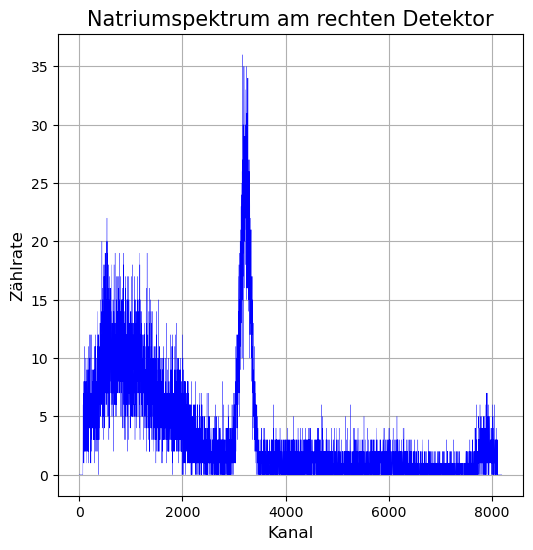

In [4]:
nal0=np.loadtxt("./A107/1-r-na-nv.txt")
chanel_nar0=nal0[:,0]
count_nar0=nal0[:,1]
plt.figure(figsize=(6,6))
plt.title('Natriumspektrum am rechten Detektor',fontsize=15)
plt.plot(chanel_nar0,count_nar0,"b-",linewidth=.2,)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()
plt.savefig('NANichtVerschoben.png')
plt.show

In [5]:
nar1=np.loadtxt("./A107/1-rechts-na-2.txt")
chanel_nar1=nar1[:,0]
count_nar1=nar1[:,1]
#plt.figure(figsize=(12,6))
#plt.title('Verschobenes Natriumspektrum am rechten Detektor',fontsize=15)
#plt.plot(chanel_nar1,count_nar1,"b-",linewidth=.2,)
#plt.xlabel('Chanel',fontsize=12)
#plt.ylabel('Count',fontsize=12)
#plt.savefig('NAVerschobenRechts.png')
#plt.grid()
#plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

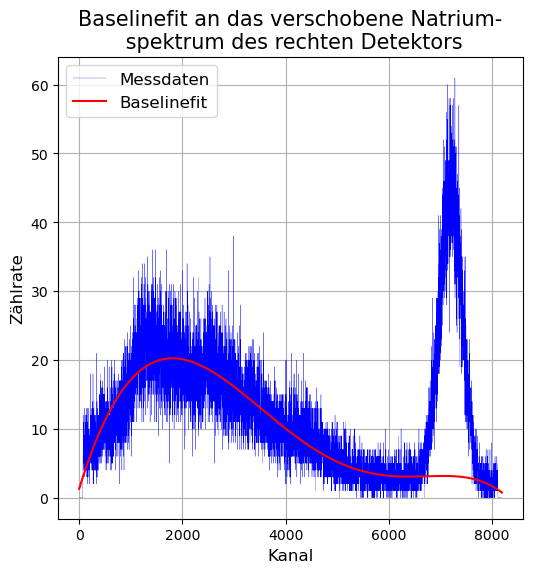

In [6]:
x=chanel_nar1
y=count_nar1
signal_range=[6500,8000]
p_bg, out_bg, mod_bg = coarseBackgroundModel(x,y,5,signal_range)  
background = mod_bg.eval(p_bg,x=x)
plt.figure(figsize=(6,6))
plt.title('Baselinefit an das verschobene Natrium-\n spektrum des rechten Detektors',fontsize=15)
plt.plot(x,y,"b-",linewidth=.2,label="Messdaten",)
plt.plot(x,background,"r-",label="Baselinefit",)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('NABaselineRechts.png')
plt.show

[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 63
    # data points      = 8192
    # variables        = 3
    chi-square         = 112791.039
    reduced chi-square = 13.7734813
    Akaike info crit   = 21488.5273
    Bayesian info crit = 21509.5600
    R-squared          = 0.84100688
[[Variables]]
    g1_amplitude:  22312.9771 +/- 125.157616 (0.56%) (init = 50)
    g1_center:     7201.41666 +/- 1.38531515 (0.02%) (init = 7400)
    g1_sigma:      213.884775 +/- 1.38530124 (0.65%) (init = 400)
    g1_fwhm:       503.660146 +/- 3.26213506 (0.65%) == '2.3548200*g1_sigma'
    g1_height:     41.6186257 +/- 0.23344564 (0.56%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.500)
    C(g1_amplitude, g1_sigma) = +0.5773


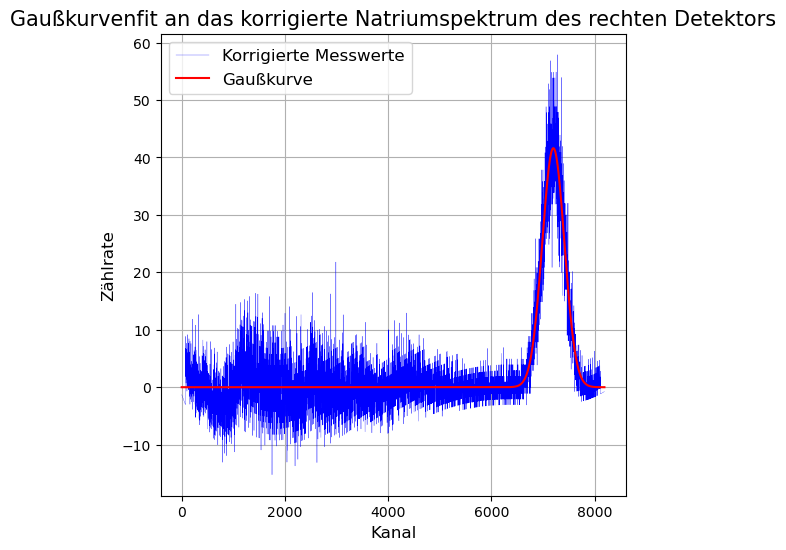

In [7]:
x1 = x
y1 = y-background

model = (GaussianModel(prefix='g1_'))

params = model.make_params(g1_amplitude=50,
                           g1_center=7400,
                           g1_sigma=400)

result = model.fit(y1, params, x=x1)
print(result.fit_report(min_correl=0.5))

lolo1=[]
lala1=[]
for name,param in result.params.items():
    if result.errorbars==True:
        lala1.append(param.stderr)
    else:
        lala1.append(0)
    lolo1.append(param.value)

comps = result.eval_components(x=x1)
dely = result.eval_uncertainty(sigma=3)

ergebnis = model.eval(params,x=x1)
plt.figure(figsize=(6,6))
plt.title('Gaußkurvenfit an das korrigierte Natriumspektrum des rechten Detektors',fontsize=15)
plt.plot(x,y-background,"b-",linewidth=.2,label="Korrigierte Messwerte",)
plt.plot(x,result.best_fit,"r-",label="Gaußkurve",)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.savefig('NAGaussRechts.png')
plt.show
with open('fitparameter_na_rechts'+'.txt','w') as f:
    for name in result.best_values:
        f.write(str(name)+'\t'+str(np.round(result.best_values[name],4))+'\n')

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 147
    # data points      = 8192
    # variables        = 9
    chi-square         = 6354267.10
    reduced chi-square = 776.520481
    Akaike info crit   = 54525.3052
    Bayesian info crit = 54588.4034
    R-squared          = 0.98234541
[[Variables]]
    g1_amplitude:  191935.908 +/- 380.428955 (0.20%) (init = 2500)
    g1_center:     462.544115 +/- 0.08021992 (0.02%) (init = 500)
    g1_sigma:      35.0507609 +/- 0.08022074 (0.23%) (init = 50)
    g2_amplitude:  104804.346 +/- 451.649094 (0.43%) (init = 1000)
    g2_center:     1230.21896 +/- 0.24583355 (0.02%) (init = 1200)
    g2_sigma:      49.4027473 +/- 0.24583605 (0.50%) (init = 50)
    g3_amplitude:  81885.9618 +/- 809.530218 (0.99%) (init = 500)
    g3_center:     5099.87965 +/- 1.81169864 (0.04%) (init = 5200)
    g3_sigma:      158.698

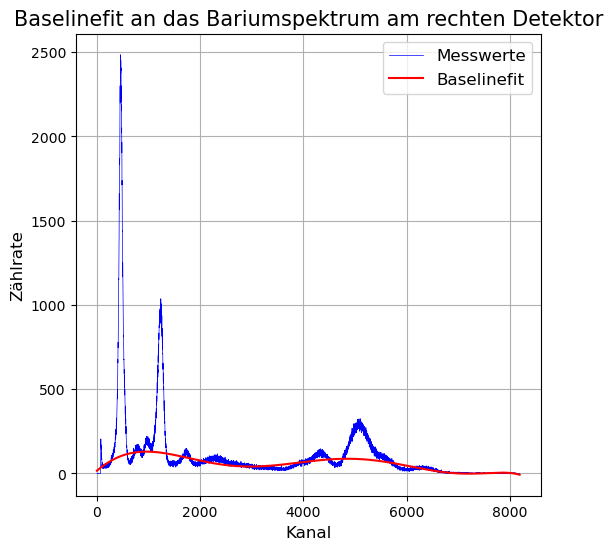

In [8]:
nar1=np.loadtxt("./A107/1-rechts-ba.txt")
chanel_nar1=nar1[:,0]
count_nar1=nar1[:,1]
#plt.figure(figsize=(12,6))
#plt.title('Bariumspektrum am rechten Detektor',fontsize=10)
#plt.plot(chanel_nar1,count_nar1,"b-",linewidth=.5,)
#plt.xlabel('Chanel')
#plt.ylabel('Count')
#plt.grid()
#plt.show



x=chanel_nar1
y=count_nar1
signal_range=[200,650,1050,1400,4600,5500]
p_bg, out_bg, mod_bg = coarseBackgroundModel2(x,y,7,signal_range)  
background = mod_bg.eval(p_bg,x=x)
plt.figure(figsize=(6,6))
plt.title('Baselinefit an das Bariumspektrum am rechten Detektor',fontsize=15)
plt.plot(x,y,"b-",linewidth=.5,label="Messwerte",)
plt.plot(x,background,"r-",label="Baselinefit",)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('BABaselineRechts.png')
plt.show

#plt.figure(figsize=(12,6))
#plt.title('Verschobenes Natriumspektrum am linken Detektor',fontsize=10)
#plt.plot(x,y-background,"b-",linewidth=.5,)
#plt.xlabel('Chanel')
#plt.ylabel('Count')
#plt.grid()
#plt.show



x1 = x
y1 = y-background

model = (GaussianModel(prefix='g1_')+
        GaussianModel(prefix='g2_')+
        GaussianModel(prefix='g3_'))

params = model.make_params(g1_amplitude=2500,
                           g1_center=500,
                           g1_sigma=50,
                           g2_amplitude=1000,
                           g2_center=1200,
                           g2_sigma=50,
                           g3_amplitude=500,
                           g3_center=5200,
                           g3_sigma=50)

result = model.fit(y1, params, x=x1)
print(result.fit_report(min_correl=0.5))

lolo2=[]
lala2=[]
for name,param in result.params.items():
    if result.errorbars==True:
        lala2.append(param.stderr)
    else:
        lala2.append(0)
    lolo2.append(param.value)

comps = result.eval_components(x=x1)
dely = result.eval_uncertainty(sigma=3)

ergebnis = model.eval(params,x=x1)
plt.figure(figsize=(6,6))
plt.title('Gaußkurvenfit an das korrigierte Bariumspektrum\n des rechten Detektors',fontsize=15)
plt.plot(x,y-background,"b-",linewidth=.5,label="Korrigierte Messwerte",)
plt.plot(x,result.best_fit,"r-",label="Gaußkurve",)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.savefig('BAGaussRechts.png')
plt.show
with open('fitparameter_ba_rechts'+'.txt','w') as f:
    for name in result.best_values:
        f.write(str(name)+'\t'+str(np.round(result.best_values[name],4))+'\n')

In [9]:
centers=[]
sigmas=[]
energies=[511,31,81,356]

indices=[1,4,7]
centers.append(lolo1[1])
sigmas.append(lolo1[2])

for i in indices:
    centers.append(lolo2[i])
    sigmas.append(lolo2[i+1])

print(centers)
print(sigmas)



[7201.416660125859, 462.54411496389736, 1230.218959247152, 5099.879654722024]
[213.8847749912484, 35.050760934138, 49.4027472804804, 158.69865366238196]


In [10]:
Er=[0,0,0,0]
s=[]
anpassungs_werte, co_var = curve_fit(gerade,centers,energies)
perr= np.sqrt(np.diag(co_var))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
#Rfit    = funktion(U2[h], *anpassungs_werte)
Rfit=[]
for E in centers:
    Rfit.append(gerade(E, *anpassungs_werte))

plt.figure(figsize=(6,6))
plt.title('Energiekalibrierung durch Geradenfit\n für den rechten Detektor',fontsize=15)
plt.plot(centers,energies,"b .",markersize=8,markeredgewidth=1.65,label="Datenpunkte",)
plt.errorbar(centers,energies,Er,sigmas,'k.',capsize=3,elinewidth=1,markersize=0,)
plt.plot(centers,Rfit,'r-',label='Anpassungsgerade')
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Energie[keV]',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('EnergiekalibrierungRechts.png')
plt.show

Durch die Anpassung bestimmte Parameter: [ 0.07129747 -4.68526705] +/- [6.38839213e-04 2.84976254e+00] nm


<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

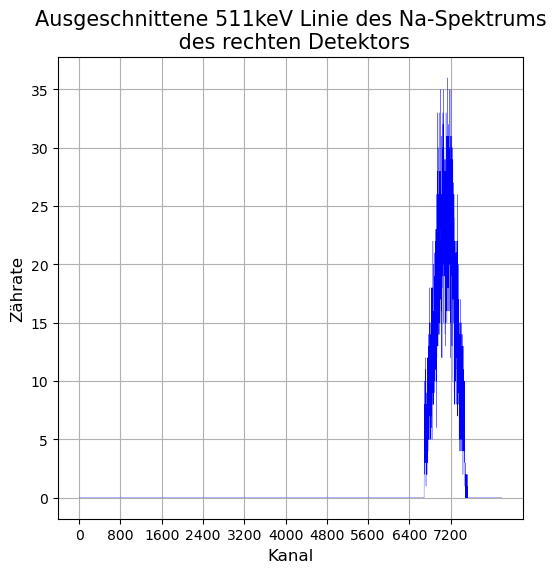

In [11]:
nar1=np.loadtxt("./A107/2-rechts-na-cut.txt")
chanel=nar1[:,0]
count=nar1[:,1]

plt.figure(figsize=(6,6))
plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des rechten Detektors',fontsize=15)
plt.plot(chanel,count,"b-",linewidth=.2,)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zährate',fontsize=12)
plt.xticks(np.arange(0, 8000, 800))
plt.grid()
plt.savefig('NACutRechts.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

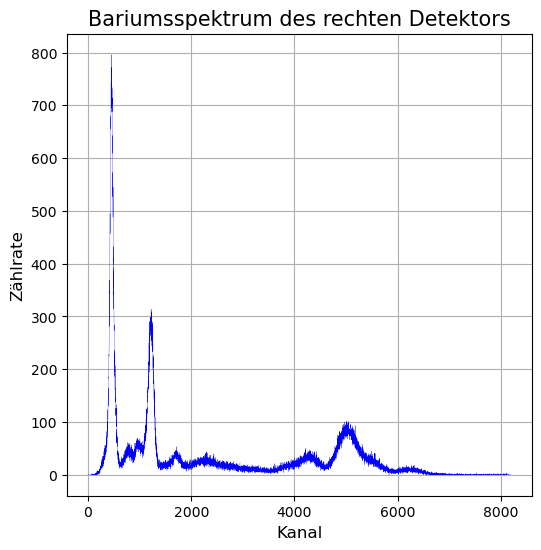

In [12]:
nar1=np.loadtxt("./A107/3-rechts-detektor_vergl-60s-ba.txt")
chanel=nar1[:,0]
count=nar1[:,1]

plt.figure(figsize=(6,6))
plt.title('Bariumsspektrum des rechten Detektors',fontsize=15)
plt.plot(chanel,count,"b-",linewidth=.2,)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()
plt.savefig('BAVergleichRechts.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

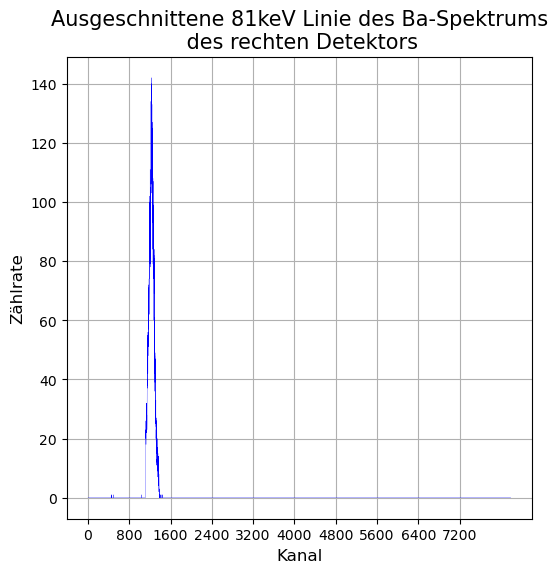

In [16]:
nar1=np.loadtxt("./A107/stoppsignal2.txt")
chanel=nar1[:,0]
count=nar1[:,1]

plt.figure(figsize=(6,6))
plt.title('Ausgeschnittene 81keV Linie des Ba-Spektrums\n des rechten Detektors',fontsize=15)
plt.plot(chanel,count,"b-",linewidth=.2,)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.xticks(np.arange(0, 8000, 800))
plt.grid()
plt.savefig('BACutRechts.png')
plt.show

In [14]:
FWHM=[82.5,116.3,373.7,503.7]
fwhmer=[0.2,0.6,4.3,3.3]
for i in range(0,4):
    print(0.07129747*FWHM[i])
    print(0.07129747*fwhmer[i])

5.882041275
0.014259494000000001
8.291895761
0.042778482
26.643864539
0.306579121
35.912535639
0.23528165099999998


In [15]:
print(0.07129747*1370-4.68526705)

92.99226685
